# Dropoutを、重みの可視化で理解する

1. Dropoutなし
2. Dropout比率=0.2
2. Dropout比率=0.5

の場合を調べる。
Dropoutも過学習を軽減させる手法なので、viz_mlp_regularization.ipynbで使用した過学習用データを用いる。
モデルには、正則化項の代わりにDropoutを入れる

In [1]:
# Kerasで必要なものをimport
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.regularizers import l1, l2

import os
import sys
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(111)

Using TensorFlow backend.


In [2]:
# 過学習用dataをload
import pickle

with open('data.pkl', 'rb') as f:
    X_train2 = pickle.load(f)
    Y_train2 = pickle.load(f)
    X_test = pickle.load(f)
    Y_test = pickle.load(f)
    
n_label = 10

## 1. Dropoutなし

In [24]:
# MLP modelを構築
# Dropoutなし
model = Sequential()
model.add(Dense(100, input_dim=X_train2.shape[1]))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(n_label))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train2, Y_train2, batch_size=30, nb_epoch=20)

Epoch 1/20
1000/1000 [==============================] - 0s - loss: 2.1151 - acc: 0.2470     
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 1.6553 - acc: 0.4590     
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 1.3937 - acc: 0.5430     
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 1.2042 - acc: 0.6010     
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 1.0396 - acc: 0.6570     
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 0.9083 - acc: 0.7100     
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 0.7894 - acc: 0.7530     
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 0.6755 - acc: 0.7960     
Epoch 9/20
1000/1000 [==============================] - 0s - loss: 0.5824 - acc: 0.8350     
Epoch 10/20
1000/1000 [==============================] - 0s - loss: 0.4900 - acc: 0.8680     
Epoch 11/20
1000/1000 [==============================] - 0s - loss: 0

10000/10000 [==============================] - 0s     

Test accuracy 0.607
std:  0.0645858


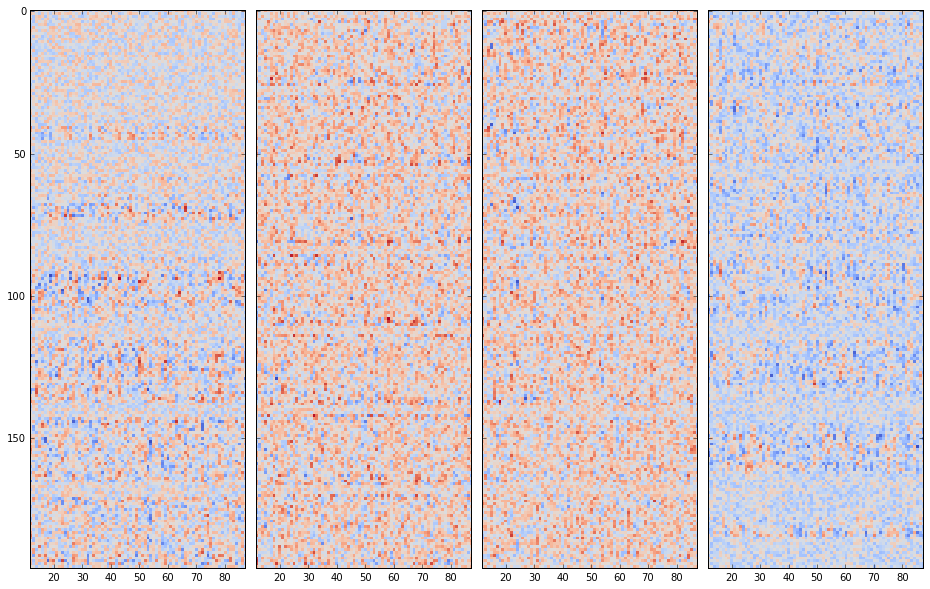

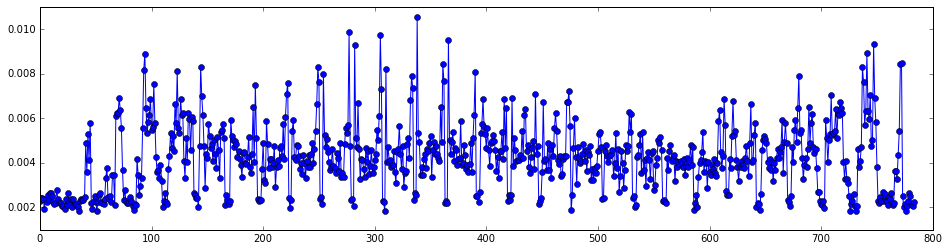

In [25]:
# Test dataの精度
v = model.evaluate(X_test, Y_test)
print('\nTest accuracy %.3f' % v[1])

w1 = model.layers[0].get_weights()[0]  # 1層目の重み

# 重みのイメージ
fig, axes = plt.subplots(1, 4, figsize=(16, 10), sharey=True)
fig.subplots_adjust(wspace=0.05)
for i in range(4):
    axes[i].imshow(w1[28*7*i:28*7*(i+1)], cmap='coolwarm', interpolation='nearest')
    
# 重みの、各input unitごとの2乗和の平均値
plt.figure(figsize=(16, 4))
plt.plot((w1**2).mean(axis=1), 'o-')
print('std: ', np.std(w1.flatten()))

###  考察

viz_mlp_regularization.ipynbの正則化なしのモデルに同じなので、そちらを参照。

# Dropout (ratio=0.2)

In [21]:
r_dropout = 0.2
model = Sequential()
model.add(Dense(100, input_dim=X_train2.shape[1]))
model.add(Dropout(r_dropout))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(n_label))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train2, Y_train2, batch_size=30, nb_epoch=20)

Epoch 1/20
1000/1000 [==============================] - 0s - loss: 2.1338 - acc: 0.2350     
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 1.7405 - acc: 0.4050     
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 1.5348 - acc: 0.4920     
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 1.3494 - acc: 0.5540     
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 1.2139 - acc: 0.6010     
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 1.1001 - acc: 0.6340     
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 1.0023 - acc: 0.6400     
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 0.8976 - acc: 0.7120     
Epoch 9/20
1000/1000 [==============================] - 0s - loss: 0.8032 - acc: 0.7300     
Epoch 10/20
1000/1000 [==============================] - 0s - loss: 0.7391 - acc: 0.7620     
Epoch 11/20
1000/1000 [==============================] - 0s - loss: 0

10000/10000 [==============================] - 0s     

Test accuracy 0.591
std:  0.0628567


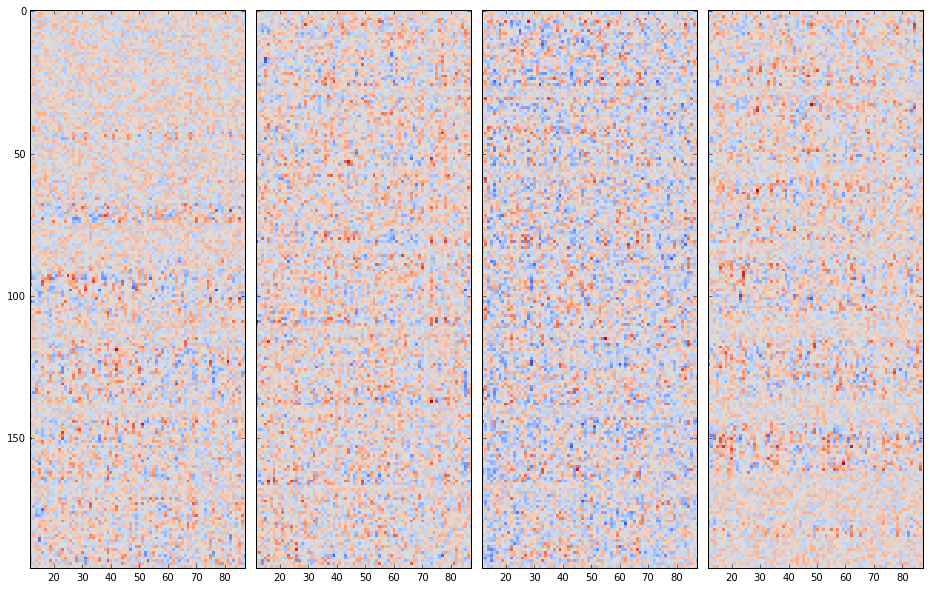

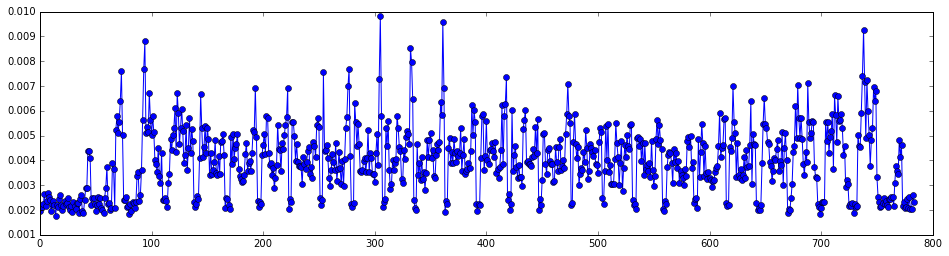

In [23]:
# Test dataの精度
v = model.evaluate(X_test, Y_test)
print('\nTest accuracy %.3f' % v[1])

w1 = model.layers[0].get_weights()[0]  # 1層目の重み

# 重みのイメージ
fig, axes = plt.subplots(1, 4, figsize=(16, 10), sharey=True)
fig.subplots_adjust(wspace=0.05)
for i in range(4):
    axes[i].imshow(w1[28*7*i:28*7*(i+1)], cmap='coolwarm', interpolation='nearest')
    
# 重みの、各input unitごとの2乗和の平均値
plt.figure(figsize=(16, 4))
plt.plot((w1**2).mean(axis=1), 'o-')
print('std: ', np.std(w1.flatten()))

### 考察

重みは、Dropoutなしと見た目に大きな変化はない。正則化の場合とは異なる重みの分布であり、同じ過学習抑制の手法ではあるがアプローチが異なることがわかる。つまり正則化のように、あまり重要でないunitの重みを刈り取る傾向が顕著ではない。正解率はDropoutなしだと~100%の正解率だが、Dropoutありだと90%まで下がっているので過学習の抑制にはなっているようだ。

Dropoutはアンサンブル学習（異なるモデルの平均値を取る）のようなものなので、重要でない重みには過度な重みがつかないと予想される。
実際、w1のバラツキを定量的に計算すると0.0628で、Dropoutなし（0.0646）の場合に比べてバラツキが減っている。

# Dropout (ratio=0.5)

In [26]:
r_dropout = 0.5
model = Sequential()
model.add(Dense(100, input_dim=X_train2.shape[1]))
model.add(Dropout(r_dropout))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(n_label))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
weights0 = model.get_weights()

model.set_weights(weights0)
model.fit(X_train2, Y_train2, batch_size=30, nb_epoch=20)

Epoch 1/20
1000/1000 [==============================] - 0s - loss: 2.2069 - acc: 0.1890     
Epoch 2/20
1000/1000 [==============================] - 0s - loss: 1.9460 - acc: 0.3250     
Epoch 3/20
1000/1000 [==============================] - 0s - loss: 1.7463 - acc: 0.4130     
Epoch 4/20
1000/1000 [==============================] - 0s - loss: 1.6054 - acc: 0.4420     
Epoch 5/20
1000/1000 [==============================] - 0s - loss: 1.5140 - acc: 0.4810     
Epoch 6/20
1000/1000 [==============================] - 0s - loss: 1.4457 - acc: 0.5040     
Epoch 7/20
1000/1000 [==============================] - 0s - loss: 1.3672 - acc: 0.5430     
Epoch 8/20
1000/1000 [==============================] - 0s - loss: 1.2816 - acc: 0.5620     
Epoch 9/20
1000/1000 [==============================] - 0s - loss: 1.2267 - acc: 0.5680     
Epoch 10/20
1000/1000 [==============================] - 0s - loss: 1.1373 - acc: 0.6100     
Epoch 11/20
1000/1000 [==============================] - 0s - loss: 1

 9952/10000 [============================>.] - ETA: 0s
Test accuracy 0.630
std:  0.0602546


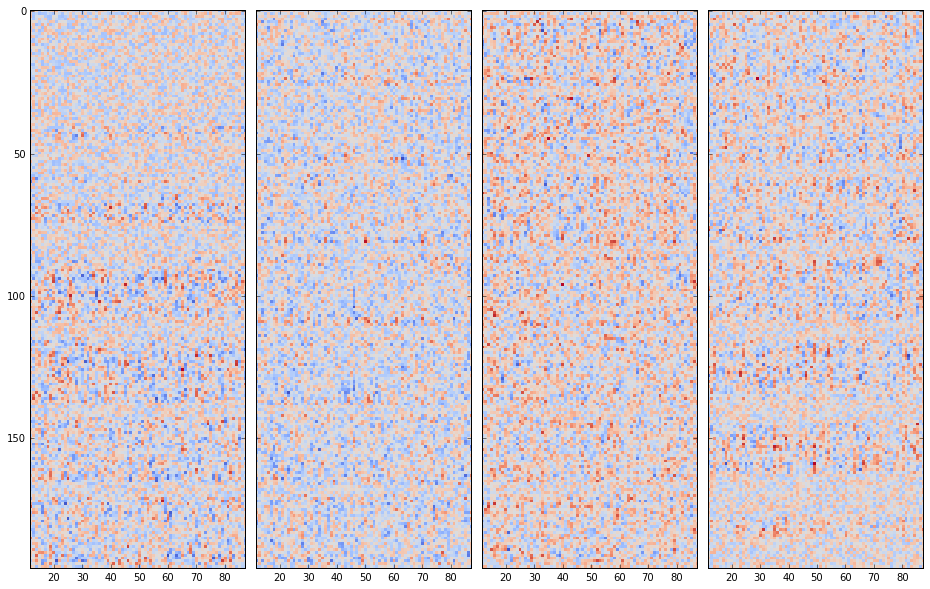

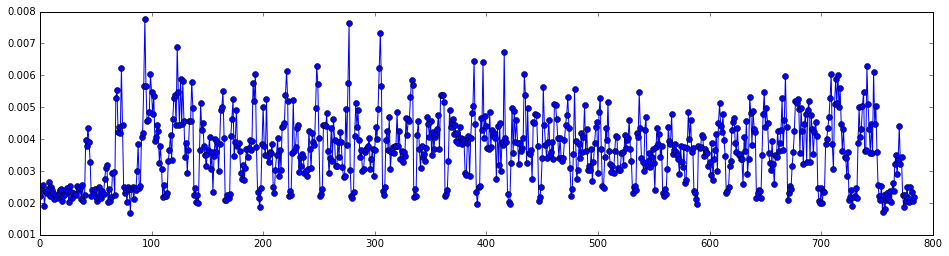

In [27]:
# Test dataの精度
v = model.evaluate(X_test, Y_test)
print('\nTest accuracy %.3f' % v[1])

w1 = model.layers[0].get_weights()[0]  # 1層目の重み

# 重みのイメージ
fig, axes = plt.subplots(1, 4, figsize=(16, 10), sharey=True)
fig.subplots_adjust(wspace=0.05)
for i in range(4):
    axes[i].imshow(w1[28*7*i:28*7*(i+1)], cmap='coolwarm', interpolation='nearest')
    
# 重みの、各input unitごとの2乗和の平均値
plt.figure(figsize=(16, 4))
plt.plot((w1**2).mean(axis=1), 'o-')
print('std: ', np.std(w1))

### 考察

図からも、重み(w1)のバラツキの大きさが減っているように見える。実際に計算すると0.0603で、Dropoutなし(0.0646）やDropout=0.2(0.0628）の場合とくらべても、バラツキが小さくなっている。Training時の正解率も80%まで低下している。今回のケースでは、おそらく使用する重みの数（パラメータ数）が少なくて良いので、Dropoutの比率を大きくした方が良いようだ。パラメータがもっと必要なケースでは、Dropoutを大きくしすぎると適切に学習できない可能性があると思われる。
